In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://stats.idre.ucla.edu/stat/stata/dae/binary.dta"
data = pd.read_stata(url)

In [3]:
print(data.head())

   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [4]:
data = pd.get_dummies(data, columns=["rank"], drop_first=True)

In [5]:
X = data.drop("admit", axis=1)
y = data["admit"]

In [6]:
X = sm.add_constant(X)

In [10]:
X = X.astype(float)
y = y.astype(float)

In [11]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [12]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 10 Sep 2025   Pseudo R-squ.:                 0.08292
Time:                        05:27:18   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.0

In [13]:
data["pred_prob"] = result.predict(X)

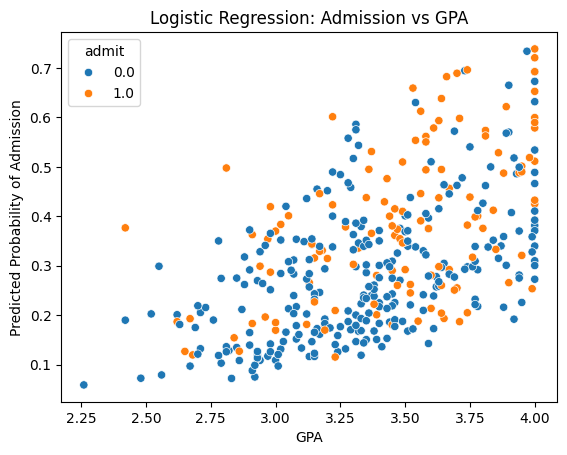

In [14]:
sns.scatterplot(x=data["gpa"], y=data["pred_prob"], hue=data["admit"])
plt.xlabel("GPA")
plt.ylabel("Predicted Probability of Admission")
plt.title("Logistic Regression: Admission vs GPA")
plt.show()